In [29]:
#line fitting with backpropagation
#import cells
import numpy as np
import math
from numpy.linalg import inv,norm
import matplotlib.pyplot as plt

In [30]:
#randomly choosing inputs
n = 300
x = np.random.uniform(low=0.0, high=1.0, size=n)
v = np.random.uniform(low=-1/10, high=1/10, size=n)


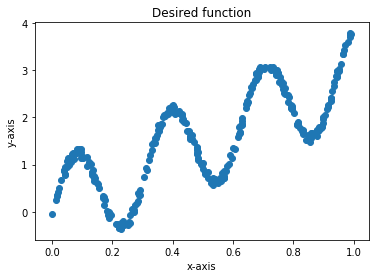

In [31]:
#desired function
d = np.zeros(n)
for i in range(len(d)):
    d[i] = math.sin(20*x[i]) + 3*x[i] + v[i]

t = []
for j in range(0,i+1):
        t.append(j)
drawGraph(x,d, 'Desired function')

In [32]:
#function to draw graphs

#x and y contain points to be plotted
def drawGraph(x, y, title):
    plt.scatter(x, y)
    
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    
    plt.title(title)
    plt.show()
    
    

In [33]:
#forward pass
#function to calculate value of given neural network

#returns intermediate_activation, intermediate_output, final_output
def forward_pass(w_L1, w_L2, x):
    X_input = np.ones(2)
    
    #adding bias term in input
    X_input[1] = x
    X_input = np.reshape(X_input, (2,1))
    intermediate_activation = np.matmul(w_L1, X_input)
    
    
    
    #apply the hyperbolic tangent function
    intermediate_output = np.tanh(intermediate_activation)
    #print('intermediate_output shape', intermediate_output.shape)
    #intermediate output goes to second layer
    
    #adding bias in intermediate output
    intermediate_output_bias = np.ones([25,1])
    k = 1
    for j in intermediate_output:
        intermediate_output_bias[k][0] = j
        k = k + 1
    
    
    #print('dimensions of w_l2', w_L2.shape)
    #print('dimensions of intermediate_output_bias', intermediate_output_bias.shape )
    final_out = np.matmul(w_L2, intermediate_output_bias)
    return intermediate_activation, intermediate_output_bias, final_out
    

In [34]:
#identical to forward pass; only returns final_out

def NNfval(w_L1, w_L2, x):
    X_input = np.ones(2)
    
    #adding bias term in input
    X_input[1] = x
    X_input = np.reshape(X_input, (2,1))
    print('x_input shape is :', X_input.shape)
    print('x_input ',X_input )
    intermediate_activation = np.matmul(w_L1, X_input)
    
    
    #apply the hyperbolic tangent function
    intermediate_output = np.tanh(intermediate_activation)
    #print('intermediate_output shape', intermediate_output.shape)
    #intermediate output goes to second layer
    
    #adding bias in intermediate output
    intermediate_output_bias = np.ones([25,1])
    k = 1
    for j in intermediate_output:
        intermediate_output_bias[k][0] = j
        k = k + 1
    
    
    #print('dimensions of w_l2', w_L2.shape)
    #print('dimensions of intermediate_output_bias', intermediate_output_bias.shape )
    final_out = np.matmul(w_L2, intermediate_output_bias)
    return final_out

In [35]:
#Energy calculation function
# params: weight_layer1, weights_layer2

#calls forward pass and finds the output of the neural network with given weights

def energy(weights_L1, weights_L2):
    sum = 0.0
    for i in range(n): 
        diff_term = d[i] - NNfval(weights_L1, weights_L2, x[i])[0][0]
        #print (diff_term)
        #print(type(diff_term))
        #print('Shape of diff term',diff_term.shape)
        #print(diff_term)
        intermediate_sum = math.pow(diff_term,2)
        sum = sum + intermediate_sum
    return sum/n

In [36]:
#other energy function
def f(w1,w2,x,y):
    #print("w0:",w[0])
    #print(w2)
    b=w2[:,0]
    w2  = np.delete(w2, 0,1)
    #print(w2.shape)
    #w2 = np.reshape(w2,(24,1))
    #print(w2)
    funcn = 0
    v= np.zeros([24,300])
    z=np.zeros([300,1])
    for j in range(0,24):
        #print((math.pow((y[ti]-(w[0]+(w[1]*x[i]))),2)))
        for i in range(0,300):
            v[j][i] = math.tanh(w1[j][1]*x[i]+w1[j][0])
    #print("v=",v)
    for i in range(0,300):
        #print("w2=",w2[:,j])
        #print(np.dot(w2,v[:,i])+b)
        z[i]=(np.dot(w2,v[:,i])+b)
        funcn = funcn+(math.pow((y[i]-z[i]),2))
    #print("z=",z)
    #print(funcn)
    return funcn/300

In [37]:
#main loop

#issues are definitely here
def gdBackprop(w_L1, w_L2, eta):
    print("eta= ", eta)
    
    #set epoch to 0 
    epoch = 0
    w1_old = w_L1-10*5
    w2_old = w_L2-10*5
    mse = f(w_L1, w_L2, x, d)
    print('Mse at start of backprop is : ',mse)
    mse_list = []
    mse_list.append(mse)
    epoch_list = [epoch]
    threshold = math.pow(10,-6)
    
    print(norm(f(w1_old,w2_old,x,d)-f(w_L1,w_L2, x, d))> threshold)
    while (norm(f(w1_old,w2_old,x,d)-f(w_L1,w_L2, x, d))> threshold):
        epoch = epoch + 1
        w1_old = w_L1
        w2_old = w_L2
        for i in range(n):
            #going forward
            intermediate_activation, intermediate_output_bias, final_output = forward_pass(w_L1, w_L2, x[i])

            #going backward
            delta2 = 2*(d[i] - final_output[0][0])

            tanh_activation_derivative = 1 - np.square(np.tanh(intermediate_activation))
            tanh_activation_derivative = np.reshape(tanh_activation_derivative, (24,1))


            product_w_L2delta2 = np.multiply(w_L2[:,1:25].T,delta2)

            delta1 = np.multiply(product_w_L2delta2, tanh_activation_derivative)
            #print("delta 1 is : ", delta1)

            dEdW2 = -np.dot(delta2, intermediate_output_bias.T)
            #print('Shape of dedW2', dEdW2.shape)
            input_matrix = np.ones([2,1])
            input_matrix[1][0] = x[i]

            #print('Shape of input matrix', input_matrix.shape)

            dEdW1 = -np.dot(delta1, input_matrix.T)
            #print('Shape of dedW2', dEdW1.shape)




            

            #TO-DO: try different etas for different layers
            product_intermediate = (eta*delta2) * intermediate_output_bias.transpose()
            #print('Shape of product_intermediate', product_intermediate.shape)


            #update weights
            w_L2 = np.subtract(w_L2, eta*dEdW2)
            #print("new W_L2: ", w_L2)
            

            input_matrix_transpose = input_matrix.transpose()
            w_L1 = w_L1 - (eta*dEdW1)
            #print("new W_L1: ", w_L1)
            
            #check mse with new weights to check if we're overshooting
            #correction: don't check mse here
        mse = f(w_L1, w_L2, x, d)
        print("MSE after epoch: ",epoch, "  " , mse)
        mse_list.append(mse)
        if(mse_list[epoch-1]<mse_list[epoch]):
            eta = (0.9*eta)
            w_L1,w_L2,mse_list,epoch=gdBackprop(w1_old,w2_old,eta)
            return w_L1,w_L2,mse_list,epoch
        
    return w_L1, w_L2, mse_list, epoch


        
        





In [38]:
# driver code 

#set initial weights
w_L1 = np.random.normal(loc=0.0, scale=1, size=[24,2])
w_L2 = np.random.normal(loc=0.0, scale=1, size=[1,25]) 
w_L2 = w_L2 * np.sqrt(1/(24))
#set eta 
eta = float(input("Enter the learning rate:"))
final_w_L1, final_w_L2, energy_list, final_epochs = gdBackprop(w_L1, w_L2, eta)

Enter the learning rate:0.01
eta=  0.01
Mse at start of backprop is :  3.6815629231196954
True
MSE after epoch:  1    0.4649308729075087
MSE after epoch:  2    0.4618207133034383
MSE after epoch:  3    0.4591346624178713
MSE after epoch:  4    0.45680295478009614
MSE after epoch:  5    0.45477123363845
MSE after epoch:  6    0.4529932474969589
MSE after epoch:  7    0.451431959559002
MSE after epoch:  8    0.4500575522626759
MSE after epoch:  9    0.44884579167620053
MSE after epoch:  10    0.44777672694023474
MSE after epoch:  11    0.446833667300713
MSE after epoch:  12    0.4460023958353924
MSE after epoch:  13    0.4452705835726313
MSE after epoch:  14    0.4446273677418039
MSE after epoch:  15    0.4440630581156171
MSE after epoch:  16    0.44356893774507444
MSE after epoch:  17    0.4431371289515092
MSE after epoch:  18    0.44276050136759515
MSE after epoch:  19    0.44243260500916537
MSE after epoch:  20    0.4421476169276815
MSE after epoch:  21    0.4419002944503323
MSE after

MSE after epoch:  189    0.42380437107277324
MSE after epoch:  190    0.4237289257976098
MSE after epoch:  191    0.4236539929308458
MSE after epoch:  192    0.4235795574261138
MSE after epoch:  193    0.4235056037060054
MSE after epoch:  194    0.42343211569561806
MSE after epoch:  195    0.4233590768586557
MSE after epoch:  196    0.4232864702354319
MSE after epoch:  197    0.4232142784821734
MSE after epoch:  198    0.42314248391106984
MSE after epoch:  199    0.4230710685305427
MSE after epoch:  200    0.4230000140852897
MSE after epoch:  201    0.4229293020957098
MSE after epoch:  202    0.42285891389636215
MSE after epoch:  203    0.4227888306732125
MSE after epoch:  204    0.42271903349943946
MSE after epoch:  205    0.4226495033696705
MSE after epoch:  206    0.42258022123256417
MSE after epoch:  207    0.42251116802169575
MSE after epoch:  208    0.4224423246847888
MSE after epoch:  209    0.4223736722113513
MSE after epoch:  210    0.4223051916588352
MSE after epoch:  211    

MSE after epoch:  378    0.41009543293144457
MSE after epoch:  379    0.41000210883217697
MSE after epoch:  380    0.4099082278968092
MSE after epoch:  381    0.40981378571991994
MSE after epoch:  382    0.4097187778020966
MSE after epoch:  383    0.4096231995483602
MSE after epoch:  384    0.4095270462670265
MSE after epoch:  385    0.40943031316898737
MSE after epoch:  386    0.409332995367402
MSE after epoch:  387    0.40923508787778573
MSE after epoch:  388    0.40913658561846117
MSE after epoch:  389    0.40903748341137475
MSE after epoch:  390    0.4089377759832378
MSE after epoch:  391    0.4088374579669839
MSE after epoch:  392    0.4087365239035162
MSE after epoch:  393    0.40863496824372203
MSE after epoch:  394    0.4085327853507383
MSE after epoch:  395    0.4084299695024428
MSE after epoch:  396    0.4083265148941525
MSE after epoch:  397    0.4082224156415122
MSE after epoch:  398    0.4081176657835515
MSE after epoch:  399    0.40801225928589957
MSE after epoch:  400   

MSE after epoch:  566    0.37788489745837717
MSE after epoch:  567    0.37762635344017764
MSE after epoch:  568    0.37736696498489475
MSE after epoch:  569    0.37710673351309487
MSE after epoch:  570    0.3768456603708928
MSE after epoch:  571    0.3765837468258825
MSE after epoch:  572    0.376320994062928
MSE after epoch:  573    0.37605740317981434
MSE after epoch:  574    0.3757929751827492
MSE after epoch:  575    0.3755277109817113
MSE after epoch:  576    0.375261611385639
MSE after epoch:  577    0.37499467709745476
MSE after epoch:  578    0.3747269087089162
MSE after epoch:  579    0.37445830669528996
MSE after epoch:  580    0.37418887140983853
MSE after epoch:  581    0.37391860307811114
MSE after epoch:  582    0.3736475017920349
MSE after epoch:  583    0.3733755675037908
MSE after epoch:  584    0.373102800019471
MSE after epoch:  585    0.37282919899250455
MSE after epoch:  586    0.3725547639168386
MSE after epoch:  587    0.3722794941198674
MSE after epoch:  588    

MSE after epoch:  753    0.2950555871982397
MSE after epoch:  754    0.29440610042362875
MSE after epoch:  755    0.2937629832288159
MSE after epoch:  756    0.2931263783072308
MSE after epoch:  757    0.29249639485842877
MSE after epoch:  758    0.2918731126192029
MSE after epoch:  759    0.2912565852756037
MSE after epoch:  760    0.29064684329898105
MSE after epoch:  761    0.2900438962972194
MSE after epoch:  762    0.28944773498659615
MSE after epoch:  763    0.28885833288334967
MSE after epoch:  764    0.28827564779733705
MSE after epoch:  765    0.28769962319023534
MSE after epoch:  766    0.2871301894417121
MSE after epoch:  767    0.28656726505102786
MSE after epoch:  768    0.286010757789268
MSE after epoch:  769    0.2854605658087667
MSE after epoch:  770    0.28491657871068515
MSE after epoch:  771    0.28437867856855426
MSE after epoch:  772    0.28384674090416057
MSE after epoch:  773    0.2833206356119268
MSE after epoch:  774    0.28280022782844216
MSE after epoch:  775

MSE after epoch:  941    0.22273605705170504
MSE after epoch:  942    0.22257005963329135
MSE after epoch:  943    0.22240748572864144
MSE after epoch:  944    0.2222483046580924
MSE after epoch:  945    0.2220924842544639
MSE after epoch:  946    0.22193999090726146
MSE after epoch:  947    0.22179078960799045
MSE after epoch:  948    0.22164484399648507
MSE after epoch:  949    0.22150211640815784
MSE after epoch:  950    0.22136256792208017
MSE after epoch:  951    0.2212261584098048
MSE after epoch:  952    0.2210928465848219
MSE after epoch:  953    0.22096259005258298
MSE after epoch:  954    0.22083534536096597
MSE after epoch:  955    0.22071106805113122
MSE after epoch:  956    0.22058971270864192
MSE after epoch:  957    0.2204712330147828
MSE after epoch:  958    0.22035558179799017
MSE after epoch:  959    0.22024271108529253
MSE after epoch:  960    0.2201325721537034
MSE after epoch:  961    0.22002511558146415
MSE after epoch:  962    0.21992029129907076
MSE after epoch:

MSE after epoch:  1124    0.20917912430590033
MSE after epoch:  1125    0.2090569978657238
MSE after epoch:  1126    0.20893348937660747
MSE after epoch:  1127    0.20880857723347476
MSE after epoch:  1128    0.20868223917904777
MSE after epoch:  1129    0.20855445229566844
MSE after epoch:  1130    0.20842519299786888
MSE after epoch:  1131    0.20829443702574876
MSE after epoch:  1132    0.20816215943922706
MSE after epoch:  1133    0.20802833461325732
MSE after epoch:  1134    0.20789293623407024
MSE after epoch:  1135    0.2077559372965379
MSE after epoch:  1136    0.20761731010274584
MSE after epoch:  1137    0.2074770262618688
MSE after epoch:  1138    0.2073350566914395
MSE after epoch:  1139    0.2071913716201365
MSE after epoch:  1140    0.20704594059217513
MSE after epoch:  1141    0.206898732473439
MSE after epoch:  1142    0.2067497154594447
MSE after epoch:  1143    0.20659885708530495
MSE after epoch:  1144    0.2064461242377828
MSE after epoch:  1145    0.206291483169585

MSE after epoch:  1306    0.1635374458796296
MSE after epoch:  1307    0.16333812799645978
MSE after epoch:  1308    0.16314000217710528
MSE after epoch:  1309    0.1629430519615792
MSE after epoch:  1310    0.16274726143275953
MSE after epoch:  1311    0.1625526152009648
MSE after epoch:  1312    0.16235909838820253
MSE after epoch:  1313    0.162166696612149
MSE after epoch:  1314    0.1619753959699732
MSE after epoch:  1315    0.1617851830220678
MSE after epoch:  1316    0.16159604477576384
MSE after epoch:  1317    0.16140796866908766
MSE after epoch:  1318    0.16122094255461997
MSE after epoch:  1319    0.16103495468351892
MSE after epoch:  1320    0.16084999368972322
MSE after epoch:  1321    0.16066604857440492
MSE after epoch:  1322    0.16048310869069254
MSE after epoch:  1323    0.16030116372869438
MSE after epoch:  1324    0.1601202037008469
MSE after epoch:  1325    0.1599402189276188
MSE after epoch:  1326    0.1597612000235716
MSE after epoch:  1327    0.1595831378838133

MSE after epoch:  1488    0.1394313107640959
MSE after epoch:  1489    0.13933750744086304
MSE after epoch:  1490    0.1392438192240272
MSE after epoch:  1491    0.139150240735587
MSE after epoch:  1492    0.13905676658384306
MSE after epoch:  1493    0.13896339136326352
MSE after epoch:  1494    0.13887010965435212
MSE after epoch:  1495    0.13877691602352207
MSE after epoch:  1496    0.1386838050229723
MSE after epoch:  1497    0.13859077119057023
MSE after epoch:  1498    0.13849780904973827
MSE after epoch:  1499    0.1384049131093456
MSE after epoch:  1500    0.13831207786360583
MSE after epoch:  1501    0.13821929779197875
MSE after epoch:  1502    0.13812656735908038
MSE after epoch:  1503    0.1380338810145974
MSE after epoch:  1504    0.13794123319320722
MSE after epoch:  1505    0.1378486183145082
MSE after epoch:  1506    0.1377560307829527
MSE after epoch:  1507    0.13766346498778972
MSE after epoch:  1508    0.13757091530301507
MSE after epoch:  1509    0.137478376087327

MSE after epoch:  1669    0.11884021585812352
MSE after epoch:  1670    0.11868136519430396
MSE after epoch:  1671    0.11852197899823269
MSE after epoch:  1672    0.11836206418951344
MSE after epoch:  1673    0.11820162789798952
MSE after epoch:  1674    0.11804067746079153
MSE after epoch:  1675    0.1178792204190889
MSE after epoch:  1676    0.1177172645145304
MSE after epoch:  1677    0.1175548176853737
MSE after epoch:  1678    0.11739188806226931
MSE after epoch:  1679    0.11722848396374391
MSE after epoch:  1680    0.11706461389132373
MSE after epoch:  1681    0.11690028652433043
MSE after epoch:  1682    0.11673551071431541
MSE after epoch:  1683    0.11657029547915222
MSE after epoch:  1684    0.11640464999676058
MSE after epoch:  1685    0.11623858359848205
MSE after epoch:  1686    0.11607210576206957
MSE after epoch:  1687    0.11590522610432678
MSE after epoch:  1688    0.11573795437335813
MSE after epoch:  1689    0.11557030044044446
MSE after epoch:  1690    0.115402274

MSE after epoch:  1851    0.08388121799501644
MSE after epoch:  1852    0.08361747866421106
MSE after epoch:  1853    0.08335305978560766
MSE after epoch:  1854    0.08308800579914323
MSE after epoch:  1855    0.08282236208268803
MSE after epoch:  1856    0.08255617489657636
MSE after epoch:  1857    0.08228949132674043
MSE after epoch:  1858    0.08202235922674002
MSE after epoch:  1859    0.08175482715871588
MSE after epoch:  1860    0.08148694433344418
MSE after epoch:  1861    0.08121876054963242
MSE after epoch:  1862    0.0809503261326944
MSE after epoch:  1863    0.08068169187296684
MSE after epoch:  1864    0.08041290896368482
MSE after epoch:  1865    0.08014402893886276
MSE after epoch:  1866    0.0798751036109905
MSE after epoch:  1867    0.07960618500907604
MSE after epoch:  1868    0.07933732531675135
MSE after epoch:  1869    0.07906857681093582
MSE after epoch:  1870    0.07879999180091772
MSE after epoch:  1871    0.07853162256820616
MSE after epoch:  1872    0.07826352

MSE after epoch:  2031    0.05367665021956791
MSE after epoch:  2032    0.05362187415047437
MSE after epoch:  2033    0.05356769723326716
MSE after epoch:  2034    0.05351410961599163
MSE after epoch:  2035    0.05346110158804289
MSE after epoch:  2036    0.05340866357899756
MSE after epoch:  2037    0.053356786157456676
MSE after epoch:  2038    0.05330546002981101
MSE after epoch:  2039    0.05325467603898448
MSE after epoch:  2040    0.053204425163163135
MSE after epoch:  2041    0.053154698514499034
MSE after epoch:  2042    0.05310548733774428
MSE after epoch:  2043    0.05305678300893489
MSE after epoch:  2044    0.053008577033995204
MSE after epoch:  2045    0.052960861047334114
MSE after epoch:  2046    0.05291362681046271
MSE after epoch:  2047    0.052866866210548515
MSE after epoch:  2048    0.052820571258980965
MSE after epoch:  2049    0.05277473408992182
MSE after epoch:  2050    0.05272934695885154
MSE after epoch:  2051    0.05268440224108835
MSE after epoch:  2052    0

MSE after epoch:  2210    0.048119331407467145
MSE after epoch:  2211    0.0480957551372127
MSE after epoch:  2212    0.048072156796750726
MSE after epoch:  2213    0.048048535157738256
MSE after epoch:  2214    0.04802488899182917
MSE after epoch:  2215    0.04800121707054043
MSE after epoch:  2216    0.047977518165107425
MSE after epoch:  2217    0.04795379104633167
MSE after epoch:  2218    0.047930034484468885
MSE after epoch:  2219    0.04790624724908914
MSE after epoch:  2220    0.04788242810896168
MSE after epoch:  2221    0.04785857583193651
MSE after epoch:  2222    0.047834689184849184
MSE after epoch:  2223    0.047810766933411
MSE after epoch:  2224    0.04778680784211775
MSE after epoch:  2225    0.047762810674168744
MSE after epoch:  2226    0.04773877419138346
MSE after epoch:  2227    0.04771469715413532
MSE after epoch:  2228    0.04769057832128369
MSE after epoch:  2229    0.04766641645012484
MSE after epoch:  2230    0.047642210296341414
MSE after epoch:  2231    0.0

MSE after epoch:  2389    0.0425751094720476
MSE after epoch:  2390    0.0425352369086359
MSE after epoch:  2391    0.042495324971120144
MSE after epoch:  2392    0.04245537549015833
MSE after epoch:  2393    0.04241539027836923
MSE after epoch:  2394    0.04237537112915643
MSE after epoch:  2395    0.04233531981559389
MSE after epoch:  2396    0.042295238089324144
MSE after epoch:  2397    0.04225512767950809
MSE after epoch:  2398    0.04221499029180637
MSE after epoch:  2399    0.04217482760740178
MSE after epoch:  2400    0.04213464128205511
MSE after epoch:  2401    0.04209443294520421
MSE after epoch:  2402    0.04205420419910257
MSE after epoch:  2403    0.042013956617990095
MSE after epoch:  2404    0.041973691747315994
MSE after epoch:  2405    0.0419334111029865
MSE after epoch:  2406    0.04189311617066059
MSE after epoch:  2407    0.04185280840508494
MSE after epoch:  2408    0.04181248922946322
MSE after epoch:  2409    0.04177216003486716
MSE after epoch:  2410    0.04173

MSE after epoch:  2568    0.03532743974217485
MSE after epoch:  2569    0.035283816664787526
MSE after epoch:  2570    0.03524010731369882
MSE after epoch:  2571    0.03519631121895898
MSE after epoch:  2572    0.03515242793486372
MSE after epoch:  2573    0.03510845704021501
MSE after epoch:  2574    0.03506439813858416
MSE after epoch:  2575    0.035020250858559934
MSE after epoch:  2576    0.03497601485397569
MSE after epoch:  2577    0.034931689804147015
MSE after epoch:  2578    0.034887275414080904
MSE after epoch:  2579    0.03484277141468578
MSE after epoch:  2580    0.03479817756295777
MSE after epoch:  2581    0.034753493642171174
MSE after epoch:  2582    0.03470871946205031
MSE after epoch:  2583    0.03466385485892781
MSE after epoch:  2584    0.0346188996958986
MSE after epoch:  2585    0.034573853862961086
MSE after epoch:  2586    0.034528717277140776
MSE after epoch:  2587    0.03448348988260845
MSE after epoch:  2588    0.03443817165079403
MSE after epoch:  2589    0.

MSE after epoch:  2745    0.026774508060599788
MSE after epoch:  2746    0.026728065697725144
MSE after epoch:  2747    0.02668173084445714
MSE after epoch:  2748    0.02663550460655517
MSE after epoch:  2749    0.026589388073668858
MSE after epoch:  2750    0.026543382319253246
MSE after epoch:  2751    0.026497488400484836
MSE after epoch:  2752    0.026451707358196394
MSE after epoch:  2753    0.026406040216795337
MSE after epoch:  2754    0.026360487984210576
MSE after epoch:  2755    0.02631505165182546
MSE after epoch:  2756    0.026269732194427464
MSE after epoch:  2757    0.026224530570157098
MSE after epoch:  2758    0.02617944772046626
MSE after epoch:  2759    0.02613448457007349
MSE after epoch:  2760    0.0260896420269386
MSE after epoch:  2761    0.02604492098222235
MSE after epoch:  2762    0.026000322310270198
MSE after epoch:  2763    0.025955846868591294
MSE after epoch:  2764    0.0259114954978337
MSE after epoch:  2765    0.025867269021787282
MSE after epoch:  2766 

MSE after epoch:  2924    0.02058446293775203
MSE after epoch:  2925    0.020561373591829742
MSE after epoch:  2926    0.02053838569867283
MSE after epoch:  2927    0.020515498673890808
MSE after epoch:  2928    0.020492711933348756
MSE after epoch:  2929    0.020470024893237307
MSE after epoch:  2930    0.020447436970132533
MSE after epoch:  2931    0.02042494758106812
MSE after epoch:  2932    0.020402556143585205
MSE after epoch:  2933    0.020380262075809574
MSE after epoch:  2934    0.020358064796494563
MSE after epoch:  2935    0.02033596372509806
MSE after epoch:  2936    0.02031395828182213
MSE after epoch:  2937    0.020292047887692212
MSE after epoch:  2938    0.020270231964592222
MSE after epoch:  2939    0.020248509935335154
MSE after epoch:  2940    0.020226881223707114
MSE after epoch:  2941    0.02020534525453086
MSE after epoch:  2942    0.020183901453706375
MSE after epoch:  2943    0.02016254924827902
MSE after epoch:  2944    0.020141288066467238
MSE after epoch:  29

MSE after epoch:  3104    0.01757483448407571
MSE after epoch:  3105    0.017562359930328186
MSE after epoch:  3106    0.01754991474702583
MSE after epoch:  3107    0.017537498751669142
MSE after epoch:  3108    0.017525111763646708
MSE after epoch:  3109    0.017512753604226355
MSE after epoch:  3110    0.01750042409653049
MSE after epoch:  3111    0.017488123065527512
MSE after epoch:  3112    0.017475850338005704
MSE after epoch:  3113    0.017463605742580476
MSE after epoch:  3114    0.01745138910965988
MSE after epoch:  3115    0.017439200271436812
MSE after epoch:  3116    0.017427039061870233
MSE after epoch:  3117    0.01741490531668222
MSE after epoch:  3118    0.017402798873329448
MSE after epoch:  3119    0.01739071957099167
MSE after epoch:  3120    0.01737866725056535
MSE after epoch:  3121    0.017366641754640397
MSE after epoch:  3122    0.01735464292748693
MSE after epoch:  3123    0.017342670615042223
MSE after epoch:  3124    0.017330724664900845
MSE after epoch:  312

MSE after epoch:  3281    0.01571437278529158
MSE after epoch:  3282    0.015705442713527345
MSE after epoch:  3283    0.015696527546354345
MSE after epoch:  3284    0.01568762725337565
MSE after epoch:  3285    0.015678741804396667
MSE after epoch:  3286    0.015669871169412545
MSE after epoch:  3287    0.015661015318614913
MSE after epoch:  3288    0.015652174222376917
MSE after epoch:  3289    0.015643347851260557
MSE after epoch:  3290    0.01563453617600475
MSE after epoch:  3291    0.01562573916753001
MSE after epoch:  3292    0.015616956796923782
MSE after epoch:  3293    0.015608189035451492
MSE after epoch:  3294    0.015599435854548442
MSE after epoch:  3295    0.015590697225805937
MSE after epoch:  3296    0.015581973120985259
MSE after epoch:  3297    0.01557326351200291
MSE after epoch:  3298    0.015564568370931058
MSE after epoch:  3299    0.015555887669996044
MSE after epoch:  3300    0.015547221381577759
MSE after epoch:  3301    0.015538569478197773
MSE after epoch:  

MSE after epoch:  3460    0.014329470978540737
MSE after epoch:  3461    0.014322818252479878
MSE after epoch:  3462    0.014316176262006873
MSE after epoch:  3463    0.014309544985652515
MSE after epoch:  3464    0.014302924401940486
MSE after epoch:  3465    0.014296314489400604
MSE after epoch:  3466    0.014289715226555722
MSE after epoch:  3467    0.014283126591929261
MSE after epoch:  3468    0.014276548564040953
MSE after epoch:  3469    0.014269981121413281
MSE after epoch:  3470    0.01426342424256105
MSE after epoch:  3471    0.01425687790600531
MSE after epoch:  3472    0.014250342090259126
MSE after epoch:  3473    0.014243816773838756
MSE after epoch:  3474    0.014237301935254021
MSE after epoch:  3475    0.014230797553021472
MSE after epoch:  3476    0.014224303605651174
MSE after epoch:  3477    0.014217820071649317
MSE after epoch:  3478    0.014211346929530133
MSE after epoch:  3479    0.014204884157799176
MSE after epoch:  3480    0.014198431734964908
MSE after epoch

MSE after epoch:  3638    0.013294660196995359
MSE after epoch:  3639    0.013289583972168369
MSE after epoch:  3640    0.013284514772974347
MSE after epoch:  3641    0.01327945258036608
MSE after epoch:  3642    0.01327439737533621
MSE after epoch:  3643    0.013269349138906577
MSE after epoch:  3644    0.013264307852140578
MSE after epoch:  3645    0.013259273496130345
MSE after epoch:  3646    0.013254246052008912
MSE after epoch:  3647    0.013249225500944033
MSE after epoch:  3648    0.013244211824135379
MSE after epoch:  3649    0.013239205002824442
MSE after epoch:  3650    0.013234205018284881
MSE after epoch:  3651    0.013229211851828454
MSE after epoch:  3652    0.013224225484807483
MSE after epoch:  3653    0.013219245898605674
MSE after epoch:  3654    0.013214273074647303
MSE after epoch:  3655    0.013209306994393015
MSE after epoch:  3656    0.013204347639342846
MSE after epoch:  3657    0.013199394991032594
MSE after epoch:  3658    0.013194449031040072
MSE after epoch

MSE after epoch:  3813    0.012498134177682108
MSE after epoch:  3814    0.012494035276399385
MSE after epoch:  3815    0.012489940758065629
MSE after epoch:  3816    0.012485850612262912
MSE after epoch:  3817    0.012481764828630709
MSE after epoch:  3818    0.012477683396868819
MSE after epoch:  3819    0.012473606306731267
MSE after epoch:  3820    0.01246953354803711
MSE after epoch:  3821    0.012465465110654508
MSE after epoch:  3822    0.012461400984518851
MSE after epoch:  3823    0.012457341159620274
MSE after epoch:  3824    0.012453285626005046
MSE after epoch:  3825    0.012449234373782545
MSE after epoch:  3826    0.012445187393117573
MSE after epoch:  3827    0.012441144674235025
MSE after epoch:  3828    0.012437106207416032
MSE after epoch:  3829    0.012433071983004881
MSE after epoch:  3830    0.01242904199139932
MSE after epoch:  3831    0.012425016223060222
MSE after epoch:  3832    0.012420994668501932
MSE after epoch:  3833    0.012416977318304568
MSE after epoch

MSE after epoch:  3991    0.011830314960341733
MSE after epoch:  3992    0.01182688611578937
MSE after epoch:  3993    0.01182346071395412
MSE after epoch:  3994    0.011820038754510017
MSE after epoch:  3995    0.01181662023719321
MSE after epoch:  3996    0.011813205161778879
MSE after epoch:  3997    0.011809793528099485
MSE after epoch:  3998    0.011806385336032598
MSE after epoch:  3999    0.011802980585509363
MSE after epoch:  4000    0.011799579276507563
MSE after epoch:  4001    0.011796181409057215
MSE after epoch:  4002    0.011792786983234623
MSE after epoch:  4003    0.011789395999168017
MSE after epoch:  4004    0.011786008457033982
MSE after epoch:  4005    0.011782624357056739
MSE after epoch:  4006    0.011779243699511614
MSE after epoch:  4007    0.011775866484719644
MSE after epoch:  4008    0.011772492713051612
MSE after epoch:  4009    0.01176912238493029
MSE after epoch:  4010    0.011765755500819134
MSE after epoch:  4011    0.01176239206123809
MSE after epoch:  

MSE after epoch:  4169    0.011275720620324578
MSE after epoch:  4170    0.011272939107215376
MSE after epoch:  4171    0.011270161604534252
MSE after epoch:  4172    0.011267388117783429
MSE after epoch:  4173    0.011264618652471733
MSE after epoch:  4174    0.011261853214118479
MSE after epoch:  4175    0.011259091808248823
MSE after epoch:  4176    0.011256334440397016
MSE after epoch:  4177    0.01125358111610599
MSE after epoch:  4178    0.0112508318409216
MSE after epoch:  4179    0.011248086620401443
MSE after epoch:  4180    0.011245345460108122
MSE after epoch:  4181    0.01124260836560691
MSE after epoch:  4182    0.011239875342476346
MSE after epoch:  4183    0.01123714639629199
MSE after epoch:  4184    0.0112344215326403
MSE after epoch:  4185    0.011231700757110396
MSE after epoch:  4186    0.011228984075297441
MSE after epoch:  4187    0.011226271492797537
MSE after epoch:  4188    0.011223563015214225
MSE after epoch:  4189    0.011220858648154114
MSE after epoch:  41

MSE after epoch:  4347    0.01084874974741775
MSE after epoch:  4348    0.010846763150193763
MSE after epoch:  4349    0.010844781368259303
MSE after epoch:  4350    0.010842804403426401
MSE after epoch:  4351    0.010840832257452707
MSE after epoch:  4352    0.010838864932053827
MSE after epoch:  4353    0.01083690242889109
MSE after epoch:  4354    0.010834944749584229
MSE after epoch:  4355    0.0108329918957043
MSE after epoch:  4356    0.010831043868769175
MSE after epoch:  4357    0.010829100670253581
MSE after epoch:  4358    0.010827162301580883
MSE after epoch:  4359    0.010825228764126239
MSE after epoch:  4360    0.010823300059216067
MSE after epoch:  4361    0.010821376188127419
MSE after epoch:  4362    0.010819457152086173
MSE after epoch:  4363    0.010817542952273105
MSE after epoch:  4364    0.01081563358981281
MSE after epoch:  4365    0.010813729065785404
MSE after epoch:  4366    0.010811829381219353
MSE after epoch:  4367    0.010809934537092059
MSE after epoch:  

MSE after epoch:  4524    0.01057171326612899
MSE after epoch:  4525    0.010570559434603527
MSE after epoch:  4526    0.010569409914712396
MSE after epoch:  4527    0.010568264699024173
MSE after epoch:  4528    0.010567123780063777
MSE after epoch:  4529    0.010565987150316264
MSE after epoch:  4530    0.010564854802221458
MSE after epoch:  4531    0.010563726728176955
MSE after epoch:  4532    0.010562602920539755
MSE after epoch:  4533    0.010561483371621648
MSE after epoch:  4534    0.010560368073695554
MSE after epoch:  4535    0.010559257018994602
MSE after epoch:  4536    0.010558150199706188
MSE after epoch:  4537    0.01055704760797825
MSE after epoch:  4538    0.010555949235919359
MSE after epoch:  4539    0.010554855075597962
MSE after epoch:  4540    0.010553765119040598
MSE after epoch:  4541    0.0105526793582351
MSE after epoch:  4542    0.010551597785129525
MSE after epoch:  4543    0.010550520391632193
MSE after epoch:  4544    0.010549447169613898
MSE after epoch: 

In [39]:
print('Epochs taken for training', final_epochs)

Epochs taken for training 4562


In [40]:
final_w_L1

array([[ 1.83735211e-01, -1.02085066e+00],
       [ 6.05484794e-04, -5.24059886e-03],
       [-6.05717570e-01,  1.76707695e+00],
       [-2.35426700e-03,  2.03773447e-02],
       [ 1.95196146e-02, -1.69218751e-01],
       [-3.54753292e-01,  4.73220271e+00],
       [-7.45455565e-02,  5.98413905e-01],
       [-1.84282865e-01,  1.02230274e+00],
       [-7.44874525e-02,  5.98057835e-01],
       [-4.30981310e-01,  1.50469912e+00],
       [ 2.01380490e-02, -1.74588589e-01],
       [-1.25893781e-01,  8.41409777e-01],
       [-3.68723360e-02,  3.18723318e-01],
       [-2.24190412e-01, -9.91428435e+00],
       [-9.75780143e-01,  3.47763815e+00],
       [ 1.59446221e+00, -3.29475479e+00],
       [ 3.89400262e+00, -1.24142856e+01],
       [-7.47906743e+00,  1.17837499e+01],
       [ 1.76234524e-01, -1.00060517e+00],
       [ 5.47614638e-02, -4.63039306e-01],
       [ 9.63381825e+00, -1.03183992e+01],
       [-3.75284015e+00,  4.66824955e+00],
       [-1.08611686e-02,  9.40686552e-02],
       [ 1.

In [41]:
final_w_L2

array([[ 9.63730315e-01,  5.75492856e-01,  2.93505360e-03,
        -9.64199961e-01, -1.14128693e-02,  9.49617326e-02,
        -2.34814496e+00, -3.40410506e-01, -5.76258407e-01,
        -3.40205406e-01, -8.22823371e-01,  9.79872897e-02,
        -4.78385181e-01, -1.79659228e-01, -5.55998691e+00,
        -1.95954634e+00,  1.97787897e+00, -3.89043309e+00,
         4.22597937e+00,  5.64786470e-01,  2.62371198e-01,
        -4.06921523e+00, -4.37573231e+00, -5.27173139e-02,
         4.68262452e-01]])

In [42]:
myfunction = np.zeros(n)
for i in range(n):
    myfunction[i] = NNfval(final_w_L1, final_w_L2, x[i])

x_input shape is : (2, 1)
x_input  [[1.        ]
 [0.27698704]]
x_input shape is : (2, 1)
x_input  [[1.        ]
 [0.64290615]]
x_input shape is : (2, 1)
x_input  [[1.        ]
 [0.15330027]]
x_input shape is : (2, 1)
x_input  [[1.      ]
 [0.532896]]
x_input shape is : (2, 1)
x_input  [[1.        ]
 [0.48020513]]
x_input shape is : (2, 1)
x_input  [[1.        ]
 [0.65837185]]
x_input shape is : (2, 1)
x_input  [[1.        ]
 [0.90511524]]
x_input shape is : (2, 1)
x_input  [[1.        ]
 [0.26958696]]
x_input shape is : (2, 1)
x_input  [[1.       ]
 [0.0691016]]
x_input shape is : (2, 1)
x_input  [[1.        ]
 [0.89361292]]
x_input shape is : (2, 1)
x_input  [[1.        ]
 [0.98755103]]
x_input shape is : (2, 1)
x_input  [[1.        ]
 [0.74853361]]
x_input shape is : (2, 1)
x_input  [[1.        ]
 [0.18945915]]
x_input shape is : (2, 1)
x_input  [[1.        ]
 [0.99318241]]
x_input shape is : (2, 1)
x_input  [[1.        ]
 [0.44497726]]
x_input shape is : (2, 1)
x_input  [[1.       

 [0.93653205]]
x_input shape is : (2, 1)
x_input  [[1.        ]
 [0.87142429]]
x_input shape is : (2, 1)
x_input  [[1.        ]
 [0.51900163]]
x_input shape is : (2, 1)
x_input  [[1.        ]
 [0.78435897]]
x_input shape is : (2, 1)
x_input  [[1.        ]
 [0.62455685]]
x_input shape is : (2, 1)
x_input  [[1.        ]
 [0.21460678]]
x_input shape is : (2, 1)
x_input  [[1.        ]
 [0.18259173]]
x_input shape is : (2, 1)
x_input  [[1.        ]
 [0.82265713]]
x_input shape is : (2, 1)
x_input  [[1.        ]
 [0.55666658]]
x_input shape is : (2, 1)
x_input  [[1.        ]
 [0.88600254]]
x_input shape is : (2, 1)
x_input  [[1.        ]
 [0.64756418]]
x_input shape is : (2, 1)
x_input  [[1.        ]
 [0.13502952]]
x_input shape is : (2, 1)
x_input  [[1.        ]
 [0.53363259]]
x_input shape is : (2, 1)
x_input  [[1.      ]
 [0.629445]]
x_input shape is : (2, 1)
x_input  [[1.        ]
 [0.40004728]]
x_input shape is : (2, 1)
x_input  [[1.        ]
 [0.96362958]]
x_input shape is : (2, 1)
x_i

In [43]:
drawAll(x, myfunction, 'MyFunction')

NameError: name 'drawAll' is not defined

In [ ]:
#test forward pass again - why getting a straight line?

test_wl1 = np.ones((24,2))
test_wl2 = np.ones((1,25))
test_i = 0.5
test_output = NNfval(test_wl1, test_wl2, test_i)
print(test_output)
print(math.tanh(1.5)*24 + 1)

In [ ]:
print(x[0])
myfunction[0]

In [ ]:
#draw both Graphs
def drawAll(x, y, title):
    plt.scatter(x, d, color = 'blue', marker = '+')
    plt.scatter(x, y, color = 'red', marker = 'x')
    
    
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    
    plt.title(title)
    plt.show()